In [161]:
import pandas as pd
import re
import missingno as msno
import matplotlib.pyplot as plt
from typing import Tuple

In [162]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('/content/dataset_passos_magicos.csv', sep=';')
df.head()

,INSTITUICAO_ENSINO_ALUNO_2020,NOME,IDADE_ALUNO_2020,ANOS_PM_2020,FASE_TURMA_2020,PONTO_VIRADA_2020,INDE_2020,INDE_CONCEITO_2020,PEDRA_2020,DESTAQUE_IEG_2020,DESTAQUE_IDA_2020,DESTAQUE_IPV_2020,IAA_2020,IEG_2020,IPS_2020,IDA_2020,IPP_2020,IPV_2020,IAN_2020,FASE_2021,TURMA_2021,INSTITUICAO_ENSINO_ALUNO_2021,SINALIZADOR_INGRESSANTE_2021,PEDRA_2021,INDE_2021,IAA_2021,IEG_2021,IPS_2021,IDA_2021,IPP_2021,REC_EQUIPE_1_2021,REC_EQUIPE_2_2021,REC_EQUIPE_3_2021,REC_EQUIPE_4_2021,PONTO_VIRADA_2021,IPV_2021,IAN_2021,NIVEL_IDEAL_2021,DEFASAGEM_2021,FASE_2022,TURMA_2022,ANO_INGRESSO_2022,BOLSISTA_2022,INDE_2022,CG_2022,CF_2022,CT_2022,PEDRA_2022,DESTAQUE_IEG_2022,DESTAQUE_IDA_2022,DESTAQUE_IPV_2022,IAA_2022,IEG_2022,IPS_2022,IDA_2022,NOTA_PORT_2022,NOTA_MAT_2022,NOTA_ING_2022,QTD_AVAL_2022,IPP_2022,REC_AVA_1_2022,REC_AVA_2_2022,REC_AVA_3_2022,REC_AVA_4_2022,INDICADO_BOLSA_2022,PONTO_VIRADA_2022,IPV_2022,IAN_2022,NIVEL_IDEAL_2022
0,Escola Pública,ALUNO-1,11,2,2H,Não,7.883752,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,8.500020000000001,8.7,7.5,7,5.9375,7.75,10,2.0,G,Rede Decisão,Ingressante,Ametista,7.319,7.5,6.3,6.9,8.8,7.7,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não avaliado,Não,8.1,5.0,Nível 3 (7o e 8o ano),-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,ALUNO-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,K,2022.0,Não,7.675509,245.0,66.0,6.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Destaque: As suas boas notas na Passos Mágicos.,Destaque: A sua boa integração aos Princípios ...,10.00002,7.581705,7.5,8.816667,8.200000,9.433333,NaN,2.0,5.625000,Mantido na Fase + Bolsa,Mantido na Fase atual,NaN,NaN,Sim,Não,7.916665,5.0,Fase 2 (5º e 6º ano)
2,Escola Pública,ALUNO-3,12,2,3H,Não,7.856389666666666,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,7.91667,8.9,7.5,5.5,8.125,8.111113333333334,10,3.0,F,Escola Pública,Veterano,Ametista,7.021,7.1,6.9,6.3,5.6,7.3,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não avaliado,Não,7.2,10.0,Nível 3 (7o e 8o ano),0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Escola Pública,ALUNO-4,10,2,1D,Não,5.076252,D,Quartzo,Ponto a melhorar em 2021: Melhorar a sua entre...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Ponto a melhorar em 2021: Integrar-se mais aos...,8.000020000000001,4.1,6.875,0,7.1875,7.75,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,J,2022.0,Não,7.117065,451.0,69.0,3.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,10.00002,8.071429,7.5,5.083333,5.000000,5.166667,NaN,3.0,6.250000,Promovido de Fase,Mantido na Fase atual,Promovido de Fase,NaN,Não,Não,8.055553,5.0,Fase 3 (7º e 8º ano)
4,Escola Pública,ALUNO-5,10,1,2M,Não,8.077085,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Seu destaque em 2020: As suas boas notas na Pa...,Seu destaque em 2020: A sua boa integração aos...,7.50002,8,7.5,7.5,8.4375,8.166665,10,2.0,L,Escola Pública,Veterano,Ametista,7.399,7.4,7.5,7.5,5.4,8.5,Promovido de Fase,Mantido na Fase atual,Mantido na Fase atual,Não avaliado,Não,7.4,10.0,Nível 2 (5o e 6o ano),0.0,2.0,L,2019.0,Não,7.232336,415.0,61.0,12.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,6.41668,8.557505,7.5,7.083333,6.666667,7.500000,NaN,3.0,6.458333,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual

In [163]:
df.shape

(1349, 69)

In [164]:
df.columns

Index(['INSTITUICAO_ENSINO_ALUNO_2020', 'NOME', 'IDADE_ALUNO_2020',
       'ANOS_PM_2020', 'FASE_TURMA_2020', 'PONTO_VIRADA_2020', 'INDE_2020',
       'INDE_CONCEITO_2020', 'PEDRA_2020', 'DESTAQUE_IEG_2020',
       'DESTAQUE_IDA_2020', 'DESTAQUE_IPV_2020', 'IAA_2020', 'IEG_2020',
       'IPS_2020', 'IDA_2020', 'IPP_2020', 'IPV_2020', 'IAN_2020', 'FASE_2021',
       'TURMA_2021', 'INSTITUICAO_ENSINO_ALUNO_2021',
       'SINALIZADOR_INGRESSANTE_2021', 'PEDRA_2021', 'INDE_2021', 'IAA_2021',
       'IEG_2021', 'IPS_2021', 'IDA_2021', 'IPP_2021', 'REC_EQUIPE_1_2021',
       'REC_EQUIPE_2_2021', 'REC_EQUIPE_3_2021', 'REC_EQUIPE_4_2021',
       'PONTO_VIRADA_2021', 'IPV_2021', 'IAN_2021', 'NIVEL_IDEAL_2021',
       'DEFASAGEM_2021', 'FASE_2022', 'TURMA_2022', 'ANO_INGRESSO_2022',
       'BOLSISTA_2022', 'INDE_2022', 'CG_2022', 'CF_2022', 'CT_2022',
       'PEDRA_2022', 'DESTAQUE_IEG_2022', 'DESTAQUE_IDA_2022',
       'DESTAQUE_IPV_2022', 'IAA_2022', 'IEG_2022', 'IPS_2022', 'IDA_2022',
       

# OBJETIVO: identificar o PONTO_VIRADA, IPV e IAN, transformar as linhas em colunas (transpose talvez?)... precisamos normaliza o dataset p facilitar o treinamento

* Predição de desempenho futuro e análise de outliers
* Recomendação para bolsas, intercambio, etc
* Tendências temporais comparando 2020, 2021 e 2022
* Análise de alunos ao longo dos anos (*Ex: temos dados do 'ALUNO 1' em 2020 e 2021, já em 2022 não temos dados... Seria talvez desistência?*)

In [165]:
def filtrar_colunas_por_ano(df, ano):
    padrao = re.compile(f'.*_{ano}$')
    colunas_ano = [col for col in df.columns if padrao.match(col) or col == 'NOME']
    df_ano = df[colunas_ano].copy()
    df_ano['ANO'] = ano
    df_ano.columns = [re.sub(f'_{ano}$', '', col) for col in df_ano.columns]

    return df_ano

In [166]:
# cortesia do prof. William
def limpar_df(df):
    _df = df.dropna(subset=df.columns.difference(['NOME', 'ANO']), how='all') # executa o dropna para todas as colunas sem visualizar a coluna NOME
    _df = _df[~_df.isna().all(axis=1)] # remove linhas com apenas NaN, se tiver algum dado na linha não remove
    return _df

In [167]:
def processar_ano(df, ano: int, stats: bool = True) -> Tuple[pd.DataFrame, pd.DataFrame]:
    df_filtrado = filtrar_colunas_por_ano(df, ano)
    df_ano = df_filtrado.query('ANO == @ano')

    if stats:
      print(f'Dataframe para o ano {ano}:')
      msno.matrix(df_ano)
      plt.show()
      print('Shape dataframe', ano, df_ano.shape)
      print('\n\n')

    df_ano_clean = limpar_df(df_ano)

    if stats:
      print(f'Dataframe limpo para o ano {ano}:')
      msno.matrix(df_ano_clean)
      plt.show()
      print('Shape dataframe limpo', ano, df_ano_clean.shape)
      print('\n\n')

    return df_ano, df_ano_clean

Dataframe para o ano 2020:


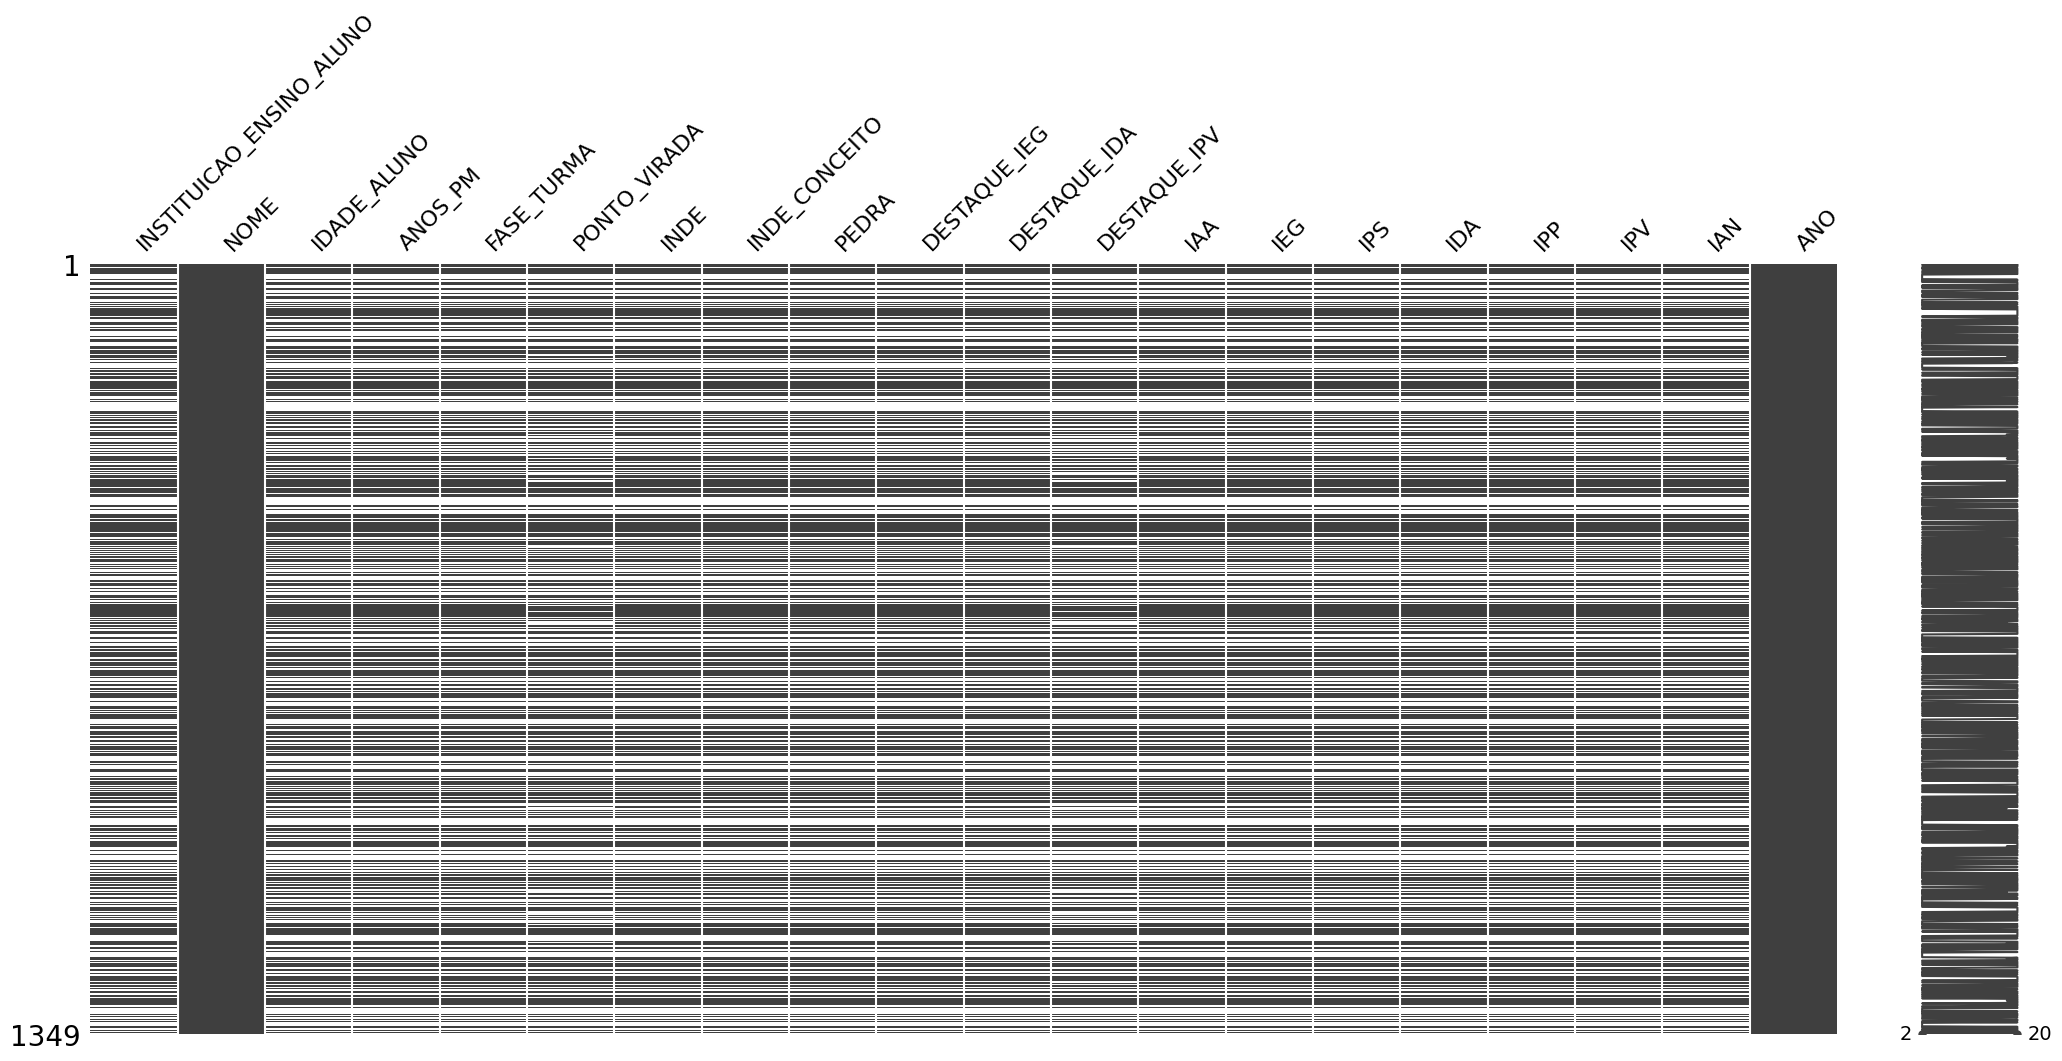

Shape dataframe 2020 (1349, 20)



Dataframe limpo para o ano 2020:


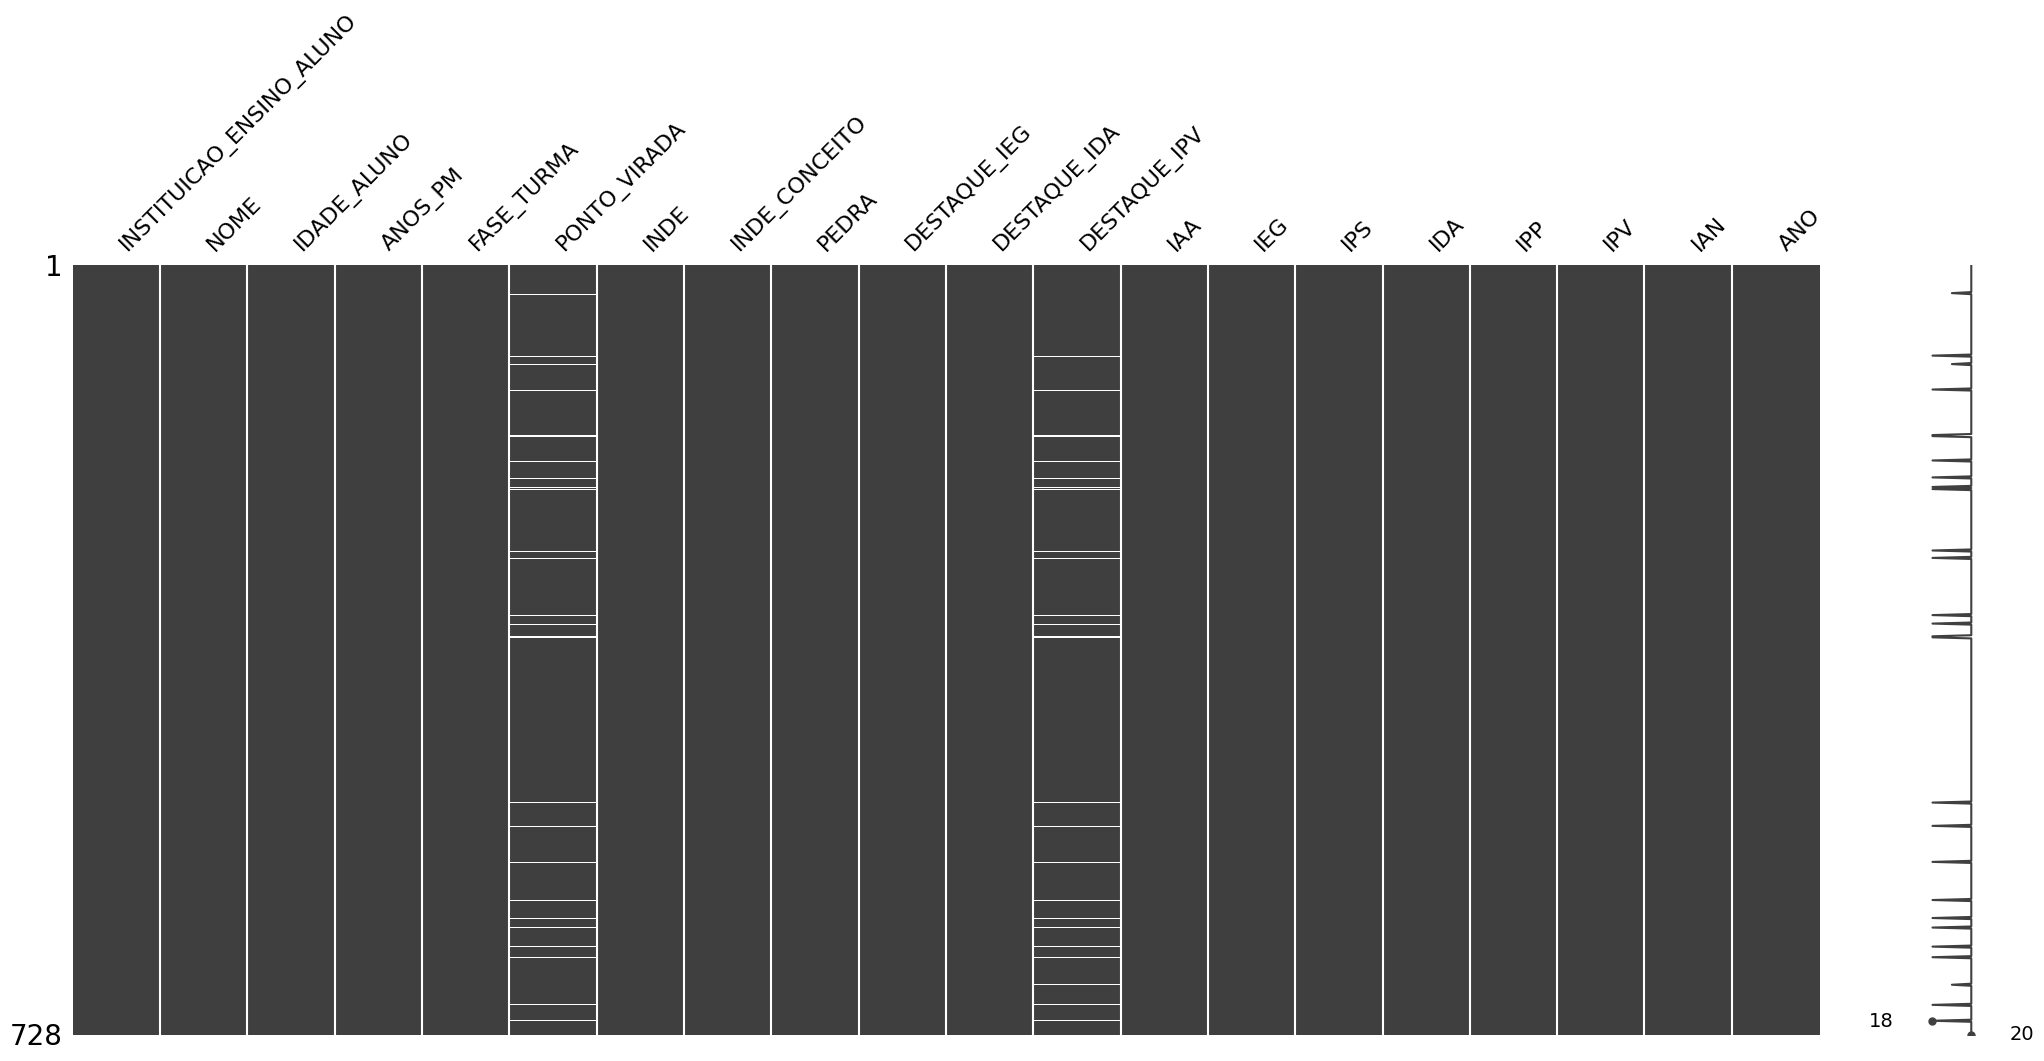

Shape dataframe limpo 2020 (728, 20)



Dataframe para o ano 2021:


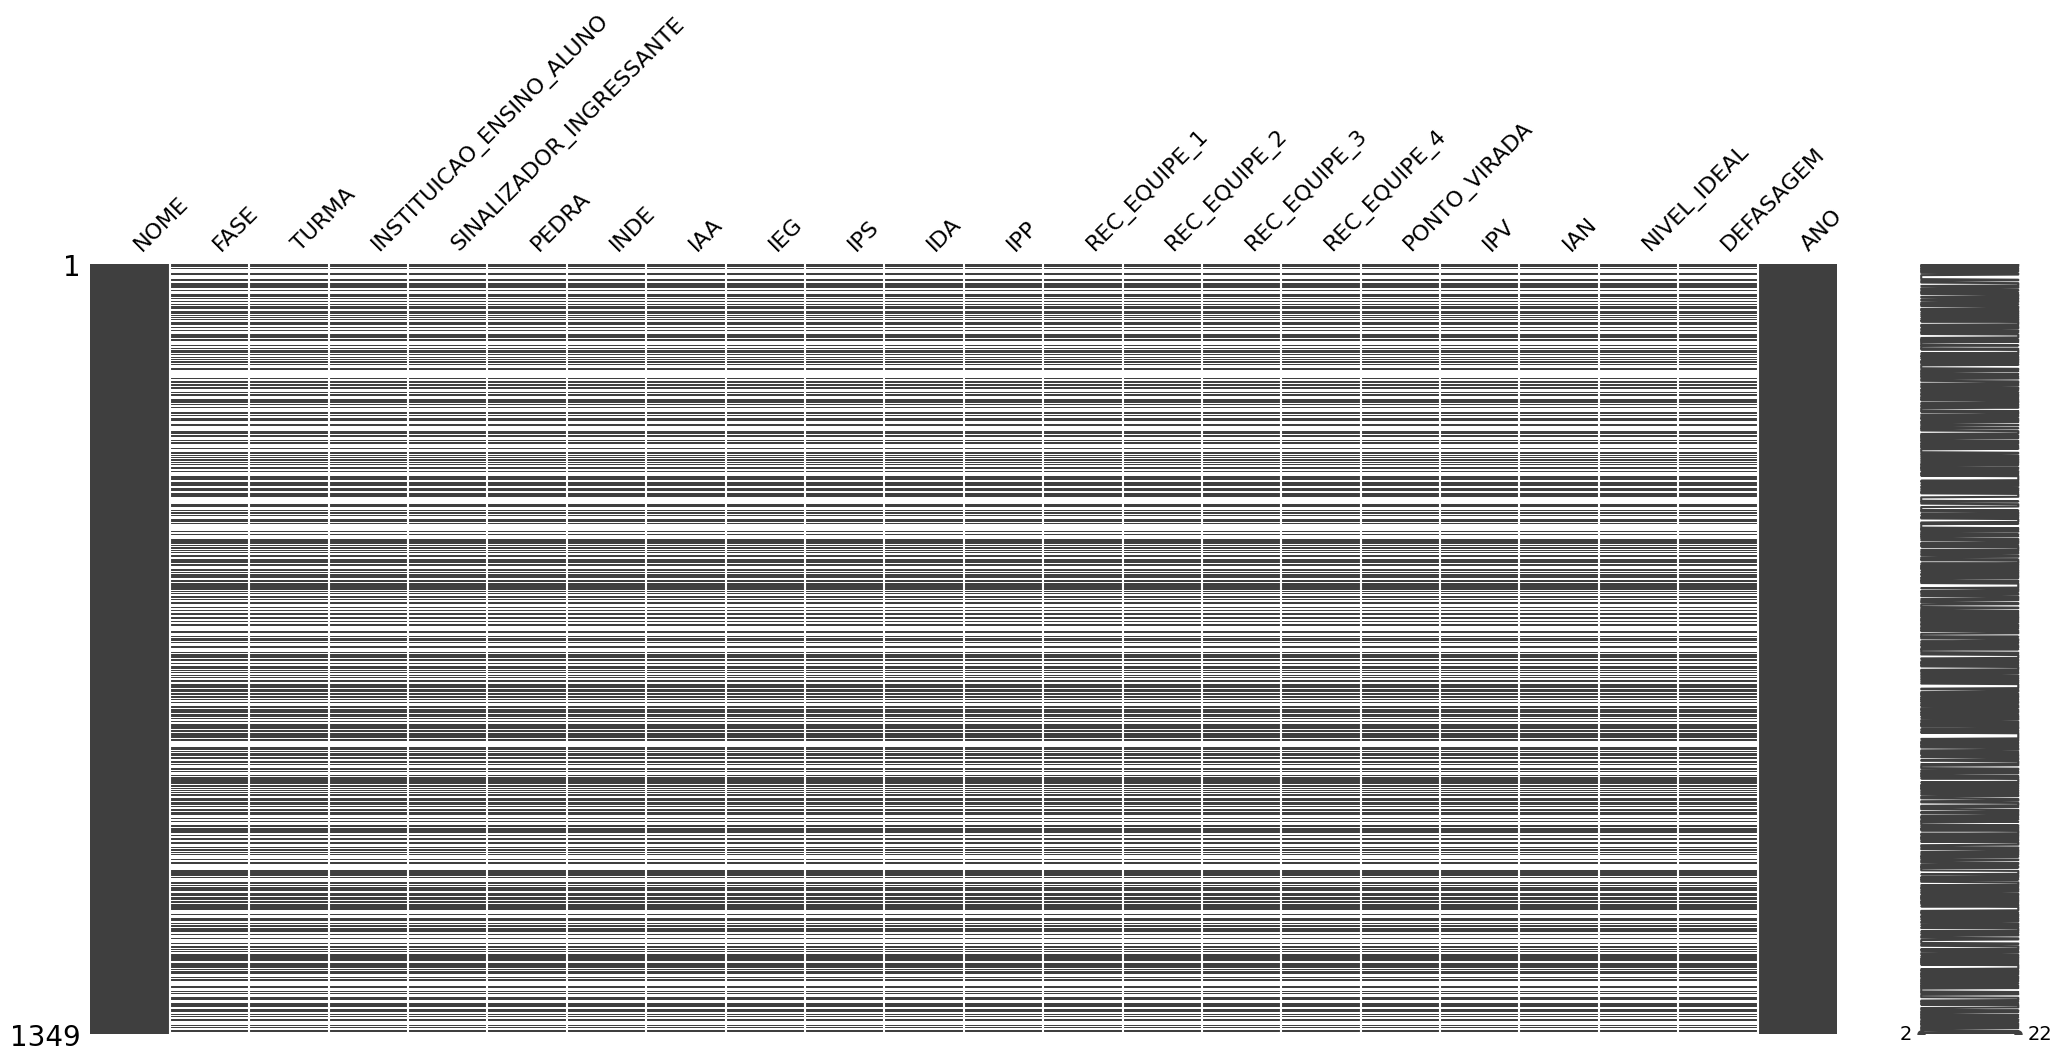

Shape dataframe 2021 (1349, 22)



Dataframe limpo para o ano 2021:


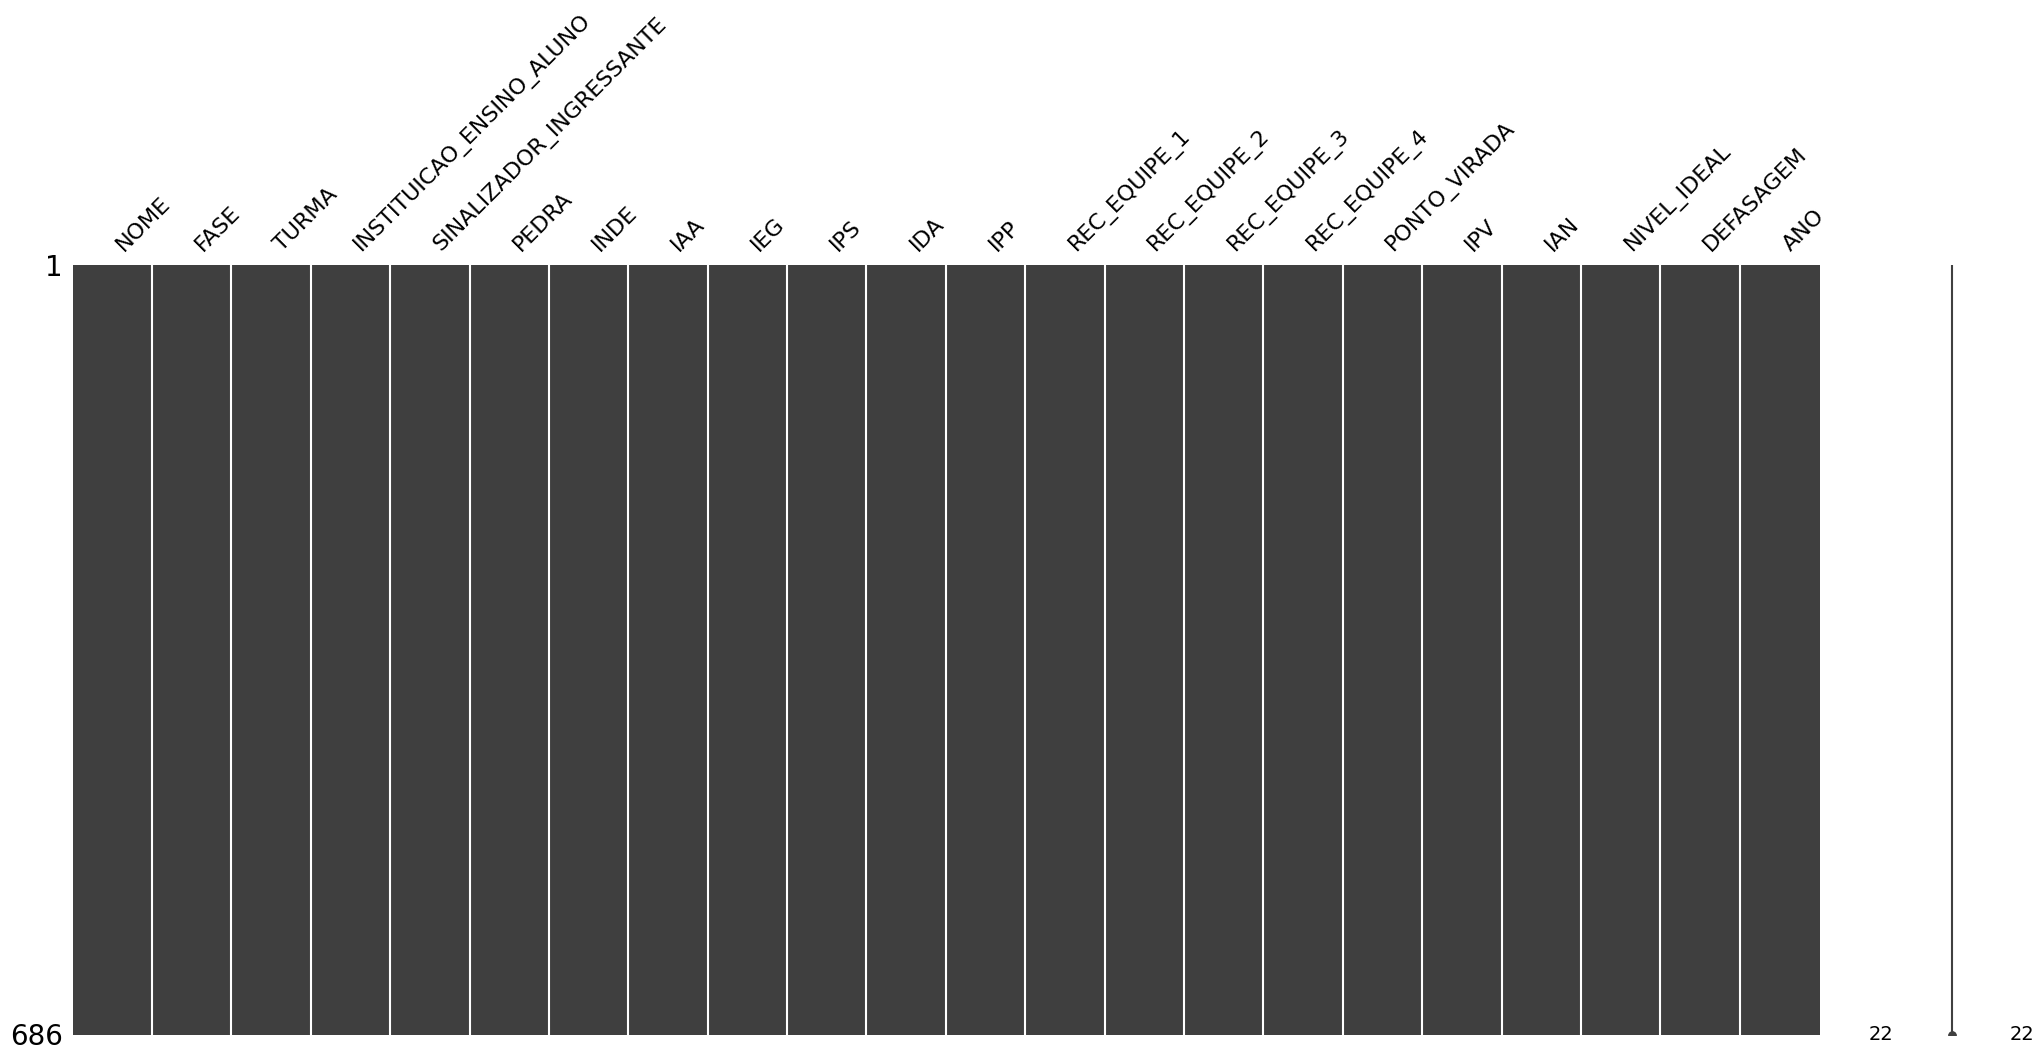

Shape dataframe limpo 2021 (686, 22)



Dataframe para o ano 2022:


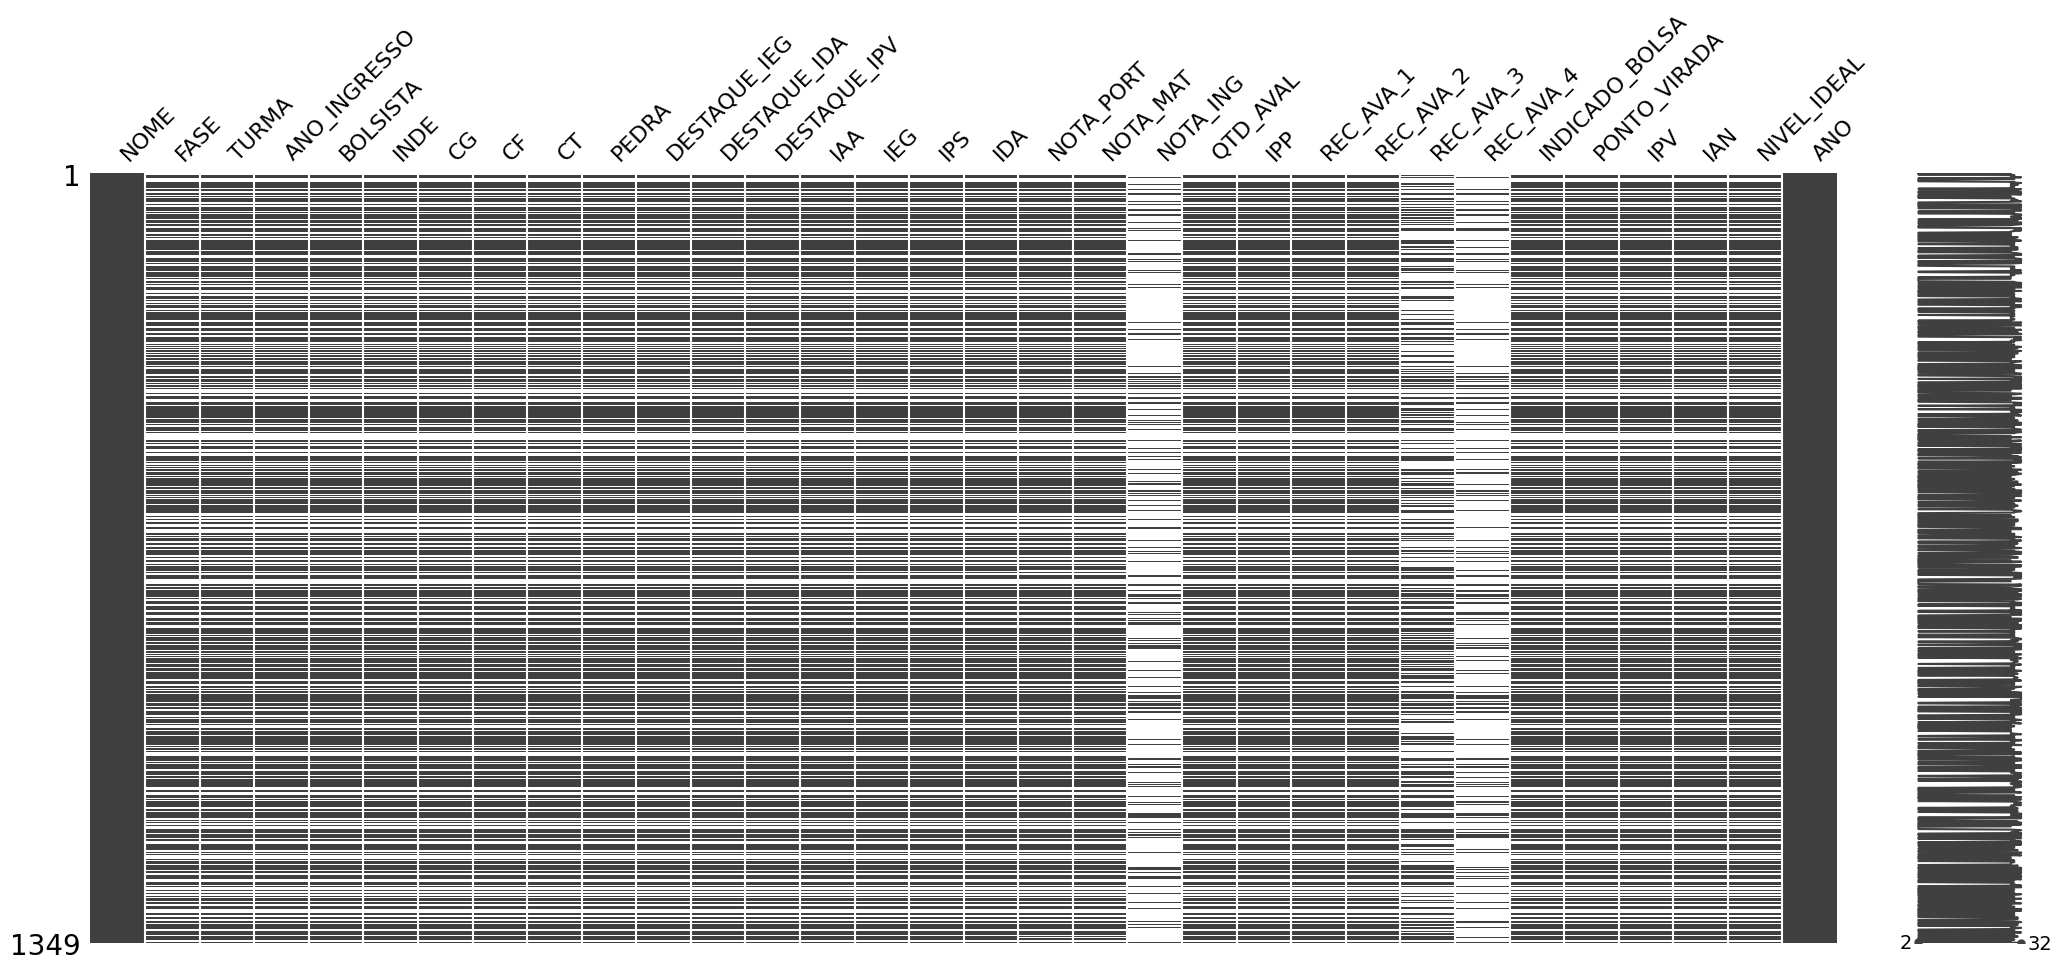

Shape dataframe 2022 (1349, 32)



Dataframe limpo para o ano 2022:


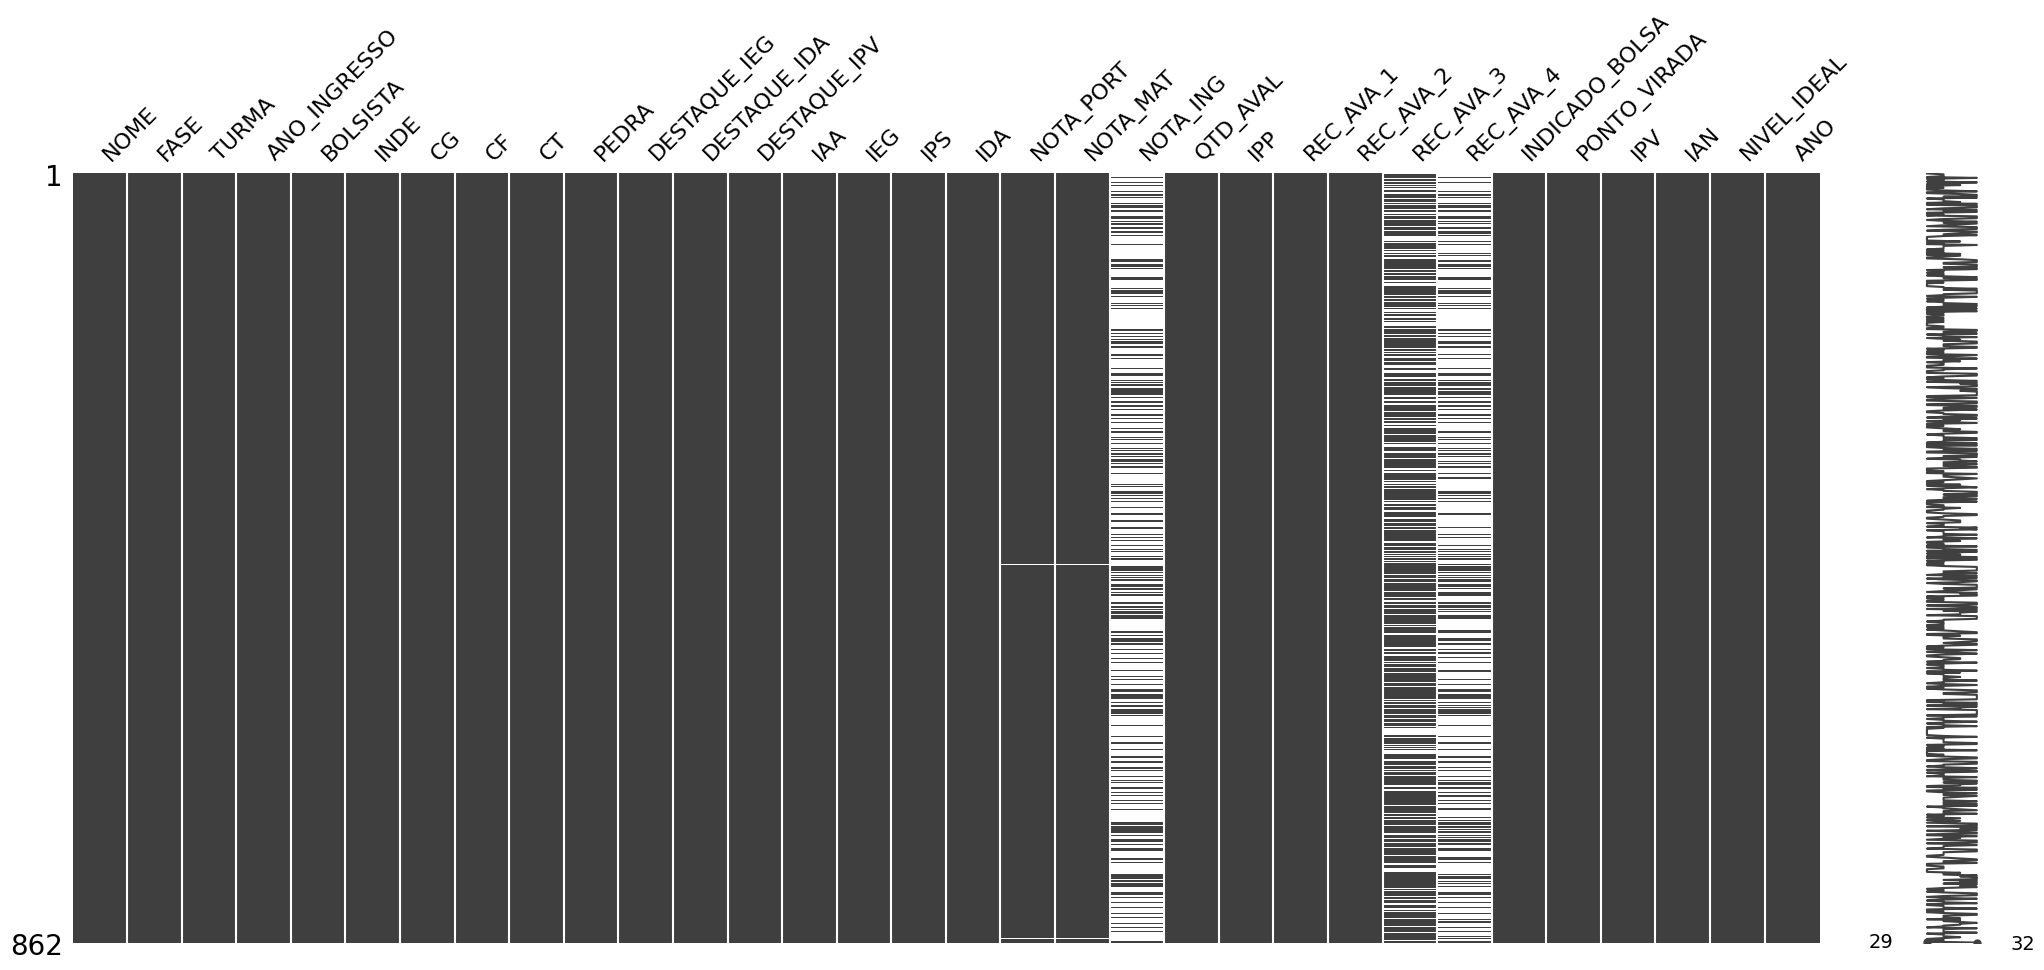

Shape dataframe limpo 2022 (862, 32)





In [168]:
# quebra o df original por ano
df_2020, df_2020_clean = processar_ano(df, 2020)
df_2021, df_2021_clean = processar_ano(df, 2021)
df_2022, df_2022_clean = processar_ano(df, 2022)
df_concat = pd.concat([df_2020_clean, df_2021_clean, df_2022_clean], ignore_index=True)

In [169]:
df_2020.head()

,INSTITUICAO_ENSINO_ALUNO,NOME,IDADE_ALUNO,ANOS_PM,FASE_TURMA,PONTO_VIRADA,INDE,INDE_CONCEITO,PEDRA,DESTAQUE_IEG,DESTAQUE_IDA,DESTAQUE_IPV,IAA,IEG,IPS,IDA,IPP,IPV,IAN,ANO
0,Escola Pública,ALUNO-1,11,2,2H,Não,7.883752,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,8.500020000000001,8.7,7.5,7,5.9375,7.75,10,2020
1,NaN,ALUNO-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020
2,Escola Pública,ALUNO-3,12,2,3H,Não,7.856389666666666,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,7.91667,8.9,7.5,5.5,8.125,8.111113333333334,10,2020
3,Escola Pública,ALUNO-4,10,2,1D,Não,5.076252,D,Quartzo,Ponto a melhorar em 2021: Melhorar a sua entre...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Ponto a melhorar em 2021: Integrar-se mais aos...,8.000020000000001,4.1,6.875,0,7.1875,7.75,5,2020
4,Escola Pública,ALUNO-5,10,1,2M,Não,8.077085,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Seu destaque em 2020: As suas boas notas na Pa...,Seu destaque em 2020: A sua boa integração aos...,7.50002,8,7.5,7.5,8.4375,8.166665,10,2020


In [170]:
df_2020_clean.head()

,INSTITUICAO_ENSINO_ALUNO,NOME,IDADE_ALUNO,ANOS_PM,FASE_TURMA,PONTO_VIRADA,INDE,INDE_CONCEITO,PEDRA,DESTAQUE_IEG,DESTAQUE_IDA,DESTAQUE_IPV,IAA,IEG,IPS,IDA,IPP,IPV,IAN,ANO
0,Escola Pública,ALUNO-1,11,2,2H,Não,7.883752,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,8.500020000000001,8.7,7.5,7,5.9375,7.75,10,2020
2,Escola Pública,ALUNO-3,12,2,3H,Não,7.856389666666666,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,7.91667,8.9,7.5,5.5,8.125,8.111113333333334,10,2020
3,Escola Pública,ALUNO-4,10,2,1D,Não,5.076252,D,Quartzo,Ponto a melhorar em 2021: Melhorar a sua entre...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Ponto a melhorar em 2021: Integrar-se mais aos...,8.000020000000001,4.1,6.875,0,7.1875,7.75,5,2020
4,Escola Pública,ALUNO-5,10,1,2M,Não,8.077085,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Seu destaque em 2020: As suas boas notas na Pa...,Seu destaque em 2020: A sua boa integração aos...,7.50002,8,7.5,7.5,8.4375,8.166665,10,2020
7,Rede Decisão/União,ALUNO-8,14,3,4L,Sim,8.381390666666666,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,8.33334,9.9,4.375,7.333333333333333,8.749999999999998,8.94445,10,2020


In [171]:
df_2021.head()

,NOME,FASE,TURMA,INSTITUICAO_ENSINO_ALUNO,SINALIZADOR_INGRESSANTE,PEDRA,INDE,IAA,IEG,IPS,IDA,IPP,REC_EQUIPE_1,REC_EQUIPE_2,REC_EQUIPE_3,REC_EQUIPE_4,PONTO_VIRADA,IPV,IAN,NIVEL_IDEAL,DEFASAGEM,ANO
0,ALUNO-1,2.0,G,Rede Decisão,Ingressante,Ametista,7.319,7.5,6.3,6.9,8.8,7.7,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não avaliado,Não,8.1,5.0,Nível 3 (7o e 8o ano),-1.0,2021
1,ALUNO-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021
2,ALUNO-3,3.0,F,Escola Pública,Veterano,Ametista,7.021,7.1,6.9,6.3,5.6,7.3,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não avaliado,Não,7.2,10.0,Nível 3 (7o e 8o ano),0.0,2021
3,ALUNO-4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021
4,ALUNO-5,2.0,L,Escola Pública,Veterano,Ametista,7.399,7.4,7.5,7.5,5.4,8.5,Promovido de Fase,Mantido na Fase atual,Mantido na Fase atual,Não avaliado,Não,7.4,10.0,Nível 2 (5o e 6o ano),0.0,2021


In [172]:
df_2021_clean.head()

,NOME,FASE,TURMA,INSTITUICAO_ENSINO_ALUNO,SINALIZADOR_INGRESSANTE,PEDRA,INDE,IAA,IEG,IPS,IDA,IPP,REC_EQUIPE_1,REC_EQUIPE_2,REC_EQUIPE_3,REC_EQUIPE_4,PONTO_VIRADA,IPV,IAN,NIVEL_IDEAL,DEFASAGEM,ANO
0,ALUNO-1,2.0,G,Rede Decisão,Ingressante,Ametista,7.319,7.5,6.3,6.9,8.8,7.7,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não avaliado,Não,8.1,5.0,Nível 3 (7o e 8o ano),-1.0,2021
2,ALUNO-3,3.0,F,Escola Pública,Veterano,Ametista,7.021,7.1,6.9,6.3,5.6,7.3,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não avaliado,Não,7.2,10.0,Nível 3 (7o e 8o ano),0.0,2021
4,ALUNO-5,2.0,L,Escola Pública,Veterano,Ametista,7.399,7.4,7.5,7.5,5.4,8.5,Promovido de Fase,Mantido na Fase atual,Mantido na Fase atual,Não avaliado,Não,7.4,10.0,Nível 2 (5o e 6o ano),0.0,2021
7,ALUNO-8,5.0,L,Rede Decisão,Veterano,Topázio,8.269,8.8,8.6,7.5,7.1,8.0,Promovido de Fase + Bolsa,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não,8.5,10.0,Nível 5 (1o EM),0.0,2021
10,ALUNO-11,1.0,A,Rede Decisão,Veterano,Topázio,8.990,9.0,10.0,6.3,8.8,7.7,Promovido de Fase,Mantido na Fase atual,Mantido na Fase atual,Não avaliado,Sim,9.7,10.0,Nível 1 (4o ano),0.0,2021


In [173]:
df_2022.head()

,NOME,FASE,TURMA,ANO_INGRESSO,BOLSISTA,INDE,CG,CF,CT,PEDRA,DESTAQUE_IEG,DESTAQUE_IDA,DESTAQUE_IPV,IAA,IEG,IPS,IDA,NOTA_PORT,NOTA_MAT,NOTA_ING,QTD_AVAL,IPP,REC_AVA_1,REC_AVA_2,REC_AVA_3,REC_AVA_4,INDICADO_BOLSA,PONTO_VIRADA,IPV,IAN,NIVEL_IDEAL,ANO
0,ALUNO-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022
1,ALUNO-2,0.0,K,2022.0,Não,7.675509,245.0,66.0,6.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Destaque: As suas boas notas na Passos Mágicos.,Destaque: A sua boa integração aos Princípios ...,10.00002,7.581705,7.5,8.816667,8.200000,9.433333,NaN,2.0,5.625000,Mantido na Fase + Bolsa,Mantido na Fase atual,NaN,NaN,Sim,Não,7.916665,5.0,Fase 2 (5º e 6º ano),2022
2,ALUNO-3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022
3,ALUNO-4,2.0,J,2022.0,Não,7.117065,451.0,69.0,3.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,10.00002,8.071429,7.5,5.083333,5.000000,5.166667,NaN,3.0,6.250000,Promovido de Fase,Mantido na Fase atual,Promovido de Fase,NaN,Não,Não,8.055553,5.0,Fase 3 (7º e 8º ano),2022
4,ALUNO-5,2.0,L,2019.0,Não,7.232336,415.0,61.0,12.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,6.41668,8.557505,7.5,7.083333,6.666667,7.500000,NaN,3.0,6.458333,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,NaN,Não,Não,7.833337,5.0,Fase 3 (7º e 8º ano),2022


In [174]:
df_2022_clean.head()

,NOME,FASE,TURMA,ANO_INGRESSO,BOLSISTA,INDE,CG,CF,CT,PEDRA,DESTAQUE_IEG,DESTAQUE_IDA,DESTAQUE_IPV,IAA,IEG,IPS,IDA,NOTA_PORT,NOTA_MAT,NOTA_ING,QTD_AVAL,IPP,REC_AVA_1,REC_AVA_2,REC_AVA_3,REC_AVA_4,INDICADO_BOLSA,PONTO_VIRADA,IPV,IAN,NIVEL_IDEAL,ANO
1,ALUNO-2,0.0,K,2022.0,Não,7.675509,245.0,66.0,6.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Destaque: As suas boas notas na Passos Mágicos.,Destaque: A sua boa integração aos Princípios ...,10.00002,7.581705,7.5,8.816667,8.200000,9.433333,NaN,2.0,5.625000,Mantido na Fase + Bolsa,Mantido na Fase atual,NaN,NaN,Sim,Não,7.916665,5.0,Fase 2 (5º e 6º ano),2022
3,ALUNO-4,2.0,J,2022.0,Não,7.117065,451.0,69.0,3.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,10.00002,8.071429,7.5,5.083333,5.000000,5.166667,NaN,3.0,6.250000,Promovido de Fase,Mantido na Fase atual,Promovido de Fase,NaN,Não,Não,8.055553,5.0,Fase 3 (7º e 8º ano),2022
4,ALUNO-5,2.0,L,2019.0,Não,7.232336,415.0,61.0,12.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,6.41668,8.557505,7.5,7.083333,6.666667,7.500000,NaN,3.0,6.458333,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,NaN,Não,Não,7.833337,5.0,Fase 3 (7º e 8º ano),2022
5,ALUNO-6,2.0,K,2022.0,Não,7.741669,221.0,35.0,2.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,9.00002,9.333333,7.5,5.500000,3.000000,8.000000,NaN,3.0,6.250000,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,NaN,Não,Não,7.500000,10.0,Fase 2 (5º e 6º ano),2022
6,ALUNO-7,1.0,U,2022.0,Não,7.406743,357.0,93.0,7.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,10.00002,9.314954,7.5,5.583333,4.666667,6.500000,NaN,2.0,5.937500,Promovido de Fase,Promovido de Fase,NaN,NaN,Não,Não,7.916670,5.0,Fase 2 (5º e 6º ano),2022


In [175]:
df_concat.head()

,INSTITUICAO_ENSINO_ALUNO,NOME,IDADE_ALUNO,ANOS_PM,FASE_TURMA,PONTO_VIRADA,INDE,INDE_CONCEITO,PEDRA,DESTAQUE_IEG,DESTAQUE_IDA,DESTAQUE_IPV,IAA,IEG,IPS,IDA,IPP,IPV,IAN,ANO,FASE,TURMA,SINALIZADOR_INGRESSANTE,REC_EQUIPE_1,REC_EQUIPE_2,REC_EQUIPE_3,REC_EQUIPE_4,NIVEL_IDEAL,DEFASAGEM,ANO_INGRESSO,BOLSISTA,CG,CF,CT,NOTA_PORT,NOTA_MAT,NOTA_ING,QTD_AVAL,REC_AVA_1,REC_AVA_2,REC_AVA_3,REC_AVA_4,INDICADO_BOLSA
0,Escola Pública,ALUNO-1,11,2,2H,Não,7.883752,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,8.500020000000001,8.7,7.5,7,5.9375,7.75,10,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Escola Pública,ALUNO-3,12,2,3H,Não,7.856389666666666,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,7.91667,8.9,7.5,5.5,8.125,8.111113333333334,10,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Escola Pública,ALUNO-4,10,2,1D,Não,5.076252,D,Quartzo,Ponto a melhorar em 2021: Melhorar a sua entre...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Ponto a melhorar em 2021: Integrar-se mais aos...,8.000020000000001,4.1,6.875,0,7.1875,7.75,5,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Escola Pública,ALUNO-5,10,1,2M,Não,8.077085,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Seu destaque em 2020: As suas boas notas na Pa...,Seu destaque em 2020: A sua boa integração aos...,7.50002,8,7.5,7.5,8.4375,8.166665,10,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Rede Decisão/União,ALUNO-8,14,3,4L,Sim,8.381390666666666,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,8.33334,9.9,4.375,7.333333333333333,8.749999999999998,8.94445,10,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [176]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2276 entries, 0 to 2275
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   INSTITUICAO_ENSINO_ALUNO  1414 non-null   object 
 1   NOME                      2276 non-null   object 
 2   IDADE_ALUNO               728 non-null    object 
 3   ANOS_PM                   728 non-null    object 
 4   FASE_TURMA                728 non-null    object 
 5   PONTO_VIRADA              2250 non-null   object 
 6   INDE                      2276 non-null   object 
 7   INDE_CONCEITO             728 non-null    object 
 8   PEDRA                     2276 non-null   object 
 9   DESTAQUE_IEG              1590 non-null   object 
 10  DESTAQUE_IDA              1590 non-null   object 
 11  DESTAQUE_IPV              1565 non-null   object 
 12  IAA                       2276 non-null   object 
 13  IEG                       2276 non-null   object 
 14  IPS     

In [177]:
df_concat.shape

(2276, 43)

In [178]:
df_concat[df_concat['NOME'] == 'ALUNO-1']

,INSTITUICAO_ENSINO_ALUNO,NOME,IDADE_ALUNO,ANOS_PM,FASE_TURMA,PONTO_VIRADA,INDE,INDE_CONCEITO,PEDRA,DESTAQUE_IEG,DESTAQUE_IDA,DESTAQUE_IPV,IAA,IEG,IPS,IDA,IPP,IPV,IAN,ANO,FASE,TURMA,SINALIZADOR_INGRESSANTE,REC_EQUIPE_1,REC_EQUIPE_2,REC_EQUIPE_3,REC_EQUIPE_4,NIVEL_IDEAL,DEFASAGEM,ANO_INGRESSO,BOLSISTA,CG,CF,CT,NOTA_PORT,NOTA_MAT,NOTA_ING,QTD_AVAL,REC_AVA_1,REC_AVA_2,REC_AVA_3,REC_AVA_4,INDICADO_BOLSA
0,Escola Pública,ALUNO-1,11,2,2H,Não,7.883752,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,8.500020000000001,8.7,7.5,7,5.9375,7.75,10,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
728,Rede Decisão,ALUNO-1,NaN,NaN,NaN,Não,7.319,NaN,Ametista,NaN,NaN,NaN,7.5,6.3,6.9,8.8,7.7,8.1,5.0,2021,2.0,G,Ingressante,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não avaliado,Nível 3 (7o e 8o ano),-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [179]:
df_final = df_concat[['NOME',	'ANO', 'IAA', 'IEG', 'IPS', 'IDA', 'IPP', 'IPV', 'IAN', 'INDE', 'PONTO_VIRADA', 'IDADE_ALUNO', 'PEDRA']]
df_final

,NOME,ANO,IAA,IEG,IPS,IDA,IPP,IPV,IAN,INDE,PONTO_VIRADA,IDADE_ALUNO,PEDRA
0,ALUNO-1,2020,8.500020000000001,8.7,7.5,7,5.9375,7.75,10,7.883752,Não,11,Ametista
1,ALUNO-3,2020,7.91667,8.9,7.5,5.5,8.125,8.111113333333334,10,7.856389666666666,Não,12,Ametista
2,ALUNO-4,2020,8.000020000000001,4.1,6.875,0,7.1875,7.75,5,5.076252,Não,10,Quartzo
3,ALUNO-5,2020,7.50002,8,7.5,7.5,8.4375,8.166665,10,8.077085,Não,10,Ametista
4,ALUNO-8,2020,8.33334,9.9,4.375,7.333333333333333,8.749999999999998,8.94445,10,8.381390666666666,Sim,14,Ametista
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2271,ALUNO-1342,2022,7.91668,9.666667,7.5,7.75,6.25,7.5,10.0,8.150001,Não,NaN,Topázio
2272,ALUNO-1343,2022,7.41668,6.470435,6.25,2.0,6.25,7.444443,5.0,5.674644,Não,NaN,Quartzo
2273,ALUNO-1346,2022,9.00002,9.031839,7.5,9.0,5.625,9.08334,5.0,8.135538,Sim,NaN,Topázio
2274,ALUNO-1348,2022,8.33334,9.17803,5.625,5.9,6.71875,5.833328,5.0,6.749981,Não,NaN,Ágata


In [180]:
df_final.query('NOME == "ALUNO-1"')

,NOME,ANO,IAA,IEG,IPS,IDA,IPP,IPV,IAN,INDE,PONTO_VIRADA,IDADE_ALUNO,PEDRA
0,ALUNO-1,2020,8.500020000000001,8.7,7.5,7,5.9375,7.75,10,7.883752,Não,11,Ametista
728,ALUNO-1,2021,7.5,6.3,6.9,8.8,7.7,8.1,5.0,7.319,Não,NaN,Ametista


In [181]:
df_2020.columns

Index(['INSTITUICAO_ENSINO_ALUNO', 'NOME', 'IDADE_ALUNO', 'ANOS_PM',
       'FASE_TURMA', 'PONTO_VIRADA', 'INDE', 'INDE_CONCEITO', 'PEDRA',
       'DESTAQUE_IEG', 'DESTAQUE_IDA', 'DESTAQUE_IPV', 'IAA', 'IEG', 'IPS',
       'IDA', 'IPP', 'IPV', 'IAN', 'ANO'],
      dtype='object')

In [182]:
df_2020['INSTITUICAO_ENSINO_ALUNO'].value_counts()

INSTITUICAO_ENSINO_ALUNO
Escola Pública          598
Rede Decisão/União      101
FIAP                     11
UNISA                    10
Estácio                   3
Einstein                  2
Escola João Paulo II      2
V202                      1
Name: count, dtype: int64

In [183]:
df_2021.columns

Index(['NOME', 'FASE', 'TURMA', 'INSTITUICAO_ENSINO_ALUNO',
       'SINALIZADOR_INGRESSANTE', 'PEDRA', 'INDE', 'IAA', 'IEG', 'IPS', 'IDA',
       'IPP', 'REC_EQUIPE_1', 'REC_EQUIPE_2', 'REC_EQUIPE_3', 'REC_EQUIPE_4',
       'PONTO_VIRADA', 'IPV', 'IAN', 'NIVEL_IDEAL', 'DEFASAGEM', 'ANO'],
      dtype='object')

In [184]:
df_2021['INSTITUICAO_ENSINO_ALUNO'].value_counts()

INSTITUICAO_ENSINO_ALUNO
Escola Pública    557
Rede Decisão      127
Escola JP II        2
Name: count, dtype: int64

In [185]:
df_2022.columns

Index(['NOME', 'FASE', 'TURMA', 'ANO_INGRESSO', 'BOLSISTA', 'INDE', 'CG', 'CF',
       'CT', 'PEDRA', 'DESTAQUE_IEG', 'DESTAQUE_IDA', 'DESTAQUE_IPV', 'IAA',
       'IEG', 'IPS', 'IDA', 'NOTA_PORT', 'NOTA_MAT', 'NOTA_ING', 'QTD_AVAL',
       'IPP', 'REC_AVA_1', 'REC_AVA_2', 'REC_AVA_3', 'REC_AVA_4',
       'INDICADO_BOLSA', 'PONTO_VIRADA', 'IPV', 'IAN', 'NIVEL_IDEAL', 'ANO'],
      dtype='object')